<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
# выведем первые 10 строк таблицы на экран
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
# изучим данные с помощью методов info() и describe()
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод
Итак, в таблице 22 столбца. В столбцах встречаются различные типы данных, а именно:`object`, `int64`, `float64`.

Согласно документации к данным:

*	`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
*	`balcony` — число балконов
*	`ceiling_height` — высота потолков (м)
*	`cityCenters_nearest` — расстояние до центра города (м)
*	`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
*	`first_day_exposition` — дата публикации
*	`floor` — этаж
*	`floors_total` — всего этажей в доме
*	`is_apartment` — апартаменты (булев тип)
*	`kitchen_area` — площадь кухни в квадратных метрах (м²)
*	`last_price` — цена на момент снятия с публикации
*	`living_area` — жилая площадь в квадратных метрах (м²)
*	`locality_name` — название населённого пункта
*	`open_plan` — свободная планировка (булев тип)
*	`parks_around3000` — число парков в радиусе 3 км
*	`parks_nearest` — расстояние до ближайшего парка (м)
*	`ponds_around3000` — число водоёмов в радиусе 3 км
*	`ponds_nearest` — расстояние до ближайшего водоёма (м)
*	`rooms` — число комнат
*	`studio` — квартира-студия (булев тип)
*	`total_area` — площадь квартиры в квадратных метрах (м²)
*	`total_images` — число фотографий квартиры в объявлении
Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

В названиях колонок установлено нарушения стиля, а именно cityCenters_nearest. Имеет смысл его переименовать.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

In [4]:
# приведем название столбца cityCenters_nearest в соответствие с хорошим стилем:
df = df.rename(columns = {'cityCenters_nearest':'cityсenters_nearest'})
# проверка результата
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## Предобработка данных

Пропуски найдены в следующих столбцах (напрвтив названия столбца указан тип переменной для определения способа обработки пропущенных значений):

* `ceiling_height` - количественная
* `floors_total` - количественная
* `living_area` - количественная
* `is_apartment` - качественная
* `kitchen_area` - количественная
* `balcony`- количественная
* `locality_name` - качественная
* `airports_nearest` - количественная
* `cityсenters_nearest` - количественная
* `parks_around3000` - количественная
* `parks_nearest` - количественная
* `ponds_around3000` - количественная
* `ponds_nearest` - количественная
* `days_exposition` - количественная

Логично предположить, что если в столбцах balcony, parks_around3000, ponds_around3000 не указали данные, то истинное значение здесь равно 0, так как балконов у квартиры / водоемов или парков поблизости нет. Заменим пропуски на 0, а заодно изменим тип данных на int, так как вещественного типа данных здесь быть не может.

In [5]:
df['balcony'] = df['balcony'].fillna(0).astype(int)
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype(int)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype(int)

От наблюдений с пустыми значениями floors_total,locality_name и cityсenters_nearest избавимся, так как отсутствие этих данных помешает нам в дальнейших рассчётах. Для заполенения столбца locality_name нам бы могли понадобиться адрес или почтовый индекс квартиры, для floors_total - высота дома, для cityсenters_nearest  невозможно  корректно рассчитать расстояние.

In [6]:
df.dropna(subset = ['floors_total', 'locality_name', 'cityсenters_nearest'], inplace = True)

Пропуски в столбцах airports_nearest, parks_nearest и ponds_nearest заменим на нетипичные значения и будем учитывать в дальнейших рассчётах.

In [7]:
df['airports_nearest'] = df['airports_nearest'].fillna(-1)
df['parks_nearest'] = df['parks_nearest'].fillna(-1)
df['ponds_nearest'] = df['ponds_nearest'].fillna(-1)
df['days_exposition'] = df['days_exposition'].fillna(-1).astype(int)

Можем предположить, что объявления с пропусками в days_exposition все ещё активны. Заполнить пустые занчния мы могли бы, спрогнозировав данные, исходя из набора параметров: цена, размер, местоположение, ситуация на рынке недвижимости и т.п. Однако, сейчас этот признак ничем не заполнять, оставить как есть с пустыми значениями.

Значение пропусков в столбце living_area посчитаем с помощью медианы, предварительно заменив NaN значения на нетипичные и сгруппировав по общей площади квартиры.

In [8]:
# заменим занчения NaN на -1
df['living_area'] = df['living_area'].fillna(-1)

In [9]:
# создадим функцию, которая c помощью последовательной фильтрации 
# сначала получит из исходной таблицы строки с жилой площадью,
# затем из результата отфильтрует строки с общей площадью квартиры,
# затем методом median заполнит пустые значения в колонке living_area 
# эти значения функция вернёт в качестве результата
def count_living_area(row):
    living_area = row['living_area']
    total_area = row['total_area']
    if living_area == -1:      
        return total_area_to_median[total_area]
    return living_area

# создадим переменную, в которой сохраиним медианное занчение столбца living_area,
# сгруппированного по столбцу total_area 
total_area_to_median = df.groupby('total_area').median()['living_area'].to_dict()    

# заполним пропуски 
df['living_area'] = df.apply(count_living_area, axis=1)

In [10]:
# проверка результата
print(len(df.query('living_area == -1')))

102


Функция сработала не во всех случаях, несколько ячеек в living_area всё ещё равны -1, для них не нашлось медианы. Эти значения выбиваются из общих данных, и их совсем мало - избавимся от них.

In [11]:
df = df[df['living_area'] != -1]

Чтобы заполнить NaN значения в kitchen_area, найдем коэффициент корреляции для kitchen_area с total_area, чтобы выявить взаимосвязь этих параметров, и если она достаточно сильна, то найдем, какую часть общей площади занимает кухня. Этот параметр добавим в таблицу как kitchen_part, найдем среднее арифметическое по этому столбцу, а затем заполним по нему пропуски.

In [12]:
# найдем коэффициент корреляции
total_to_kitchen_area_corr = df['total_area'].corr(df['kitchen_area'])
print(total_to_kitchen_area_corr)

0.6161700017397614


In [13]:
# создадим столбец kitchen_part и сохраним свдения о том, какую часть занимает кухня от общей
# площади квартиры
df['kitchen_part'] = df['kitchen_area'] / df['total_area']

In [14]:
# рассчитаем среднее значение
kitchen_mean = df['kitchen_part'].mean()
print(kitchen_mean)

0.18593708131281736


In [15]:
# заполним пропуски в столбце kitchen_area
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * kitchen_mean).round(1)

Подумаем, как заполнить пропуски в ceiling_height. Заполнение их медианным или средним значением может привести к искажению данных, поэтому посмотрим на корреляцию и заполним пропуски на основании данных из другого столбца. Например, rooms.

In [16]:
print(df['ceiling_height'].corr(df['rooms']))

0.06376660812427183


Коэффициент корреляции очень высокий, следовательно столбец rooms подойдет для обрабтки пустых значений.

In [17]:
# заменим занчения NaN на -1
df['ceiling_height'] = df['ceiling_height'].fillna(-1)

In [18]:
# создадим функцию, которая c помощью последовательной фильтрации 
# сначала получит из исходной таблицы строки с высотой потолков (м),
# затем из результата отфильтрует строки с числом комнат,
# затем методом median заполнит пустые значения в колонке ceiling_height 
# эти значения функция вернёт в качестве результата
def count_ceiling_height(row):
    ceiling_height = row['ceiling_height']
    rooms = row['rooms']
    if ceiling_height == -1:      
        return rooms_to_median[rooms]
    return ceiling_height

# создадим переменную, в которой сохраиним медианное занчение столбца ceiling_height,
# сгруппированного по столбцу rooms 
rooms_to_median = df.groupby('rooms').median()['ceiling_height'].to_dict()    

# заполним пропуски 
df['ceiling_height'] = df.apply(count_ceiling_height, axis=1)

В столбце is_apartment слишком мало ненулевых значений, у тому же, в процессе работы над проектом мы не будем использовать этот столбец, поэтому от него можно избавиться. Также можно избавиться от столбцов total_images, studio и open_plan - в дальнейшей работе они нам не понадобятся.

In [19]:
df.drop(['is_apartment'], axis='columns', inplace=True)
df.drop(['total_images'], axis='columns', inplace=True)
df.drop(['studio'], axis='columns', inplace=True)
df.drop(['open_plan'], axis='columns', inplace=True)

Приведем столбец first_day_exposition к типу данных datetime.

In [20]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y%m%dT%H:%M:%S')

Столбец floors_total приведем к типу данных int - в этом столбце не может быть вещественного типа данных.

In [21]:
df['floors_total'] = df['floors_total'].astype(int)

Данные в столбце kitchen_area округлим до десятых для удобства.

In [22]:
df['kitchen_area'] = df['kitchen_area'].round(1)

Проверим, насколько успешно удалось заполнить пропуски и заменить типы данных. Если все получилось, можем приступать к добавлению новых столбцов в таблицу.

In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17962 entries, 0 to 23694
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            17962 non-null  float64       
 1   total_area            17962 non-null  float64       
 2   first_day_exposition  17962 non-null  datetime64[ns]
 3   rooms                 17962 non-null  int64         
 4   ceiling_height        17962 non-null  float64       
 5   floors_total          17962 non-null  int64         
 6   living_area           17962 non-null  float64       
 7   floor                 17962 non-null  int64         
 8   kitchen_area          17962 non-null  float64       
 9   balcony               17962 non-null  int64         
 10  locality_name         17962 non-null  object        
 11  airports_nearest      17962 non-null  float64       
 12  cityсenters_nearest   17962 non-null  float64       
 13  parks_around3000

## Расчёты и добавление результатов в таблицу

Посчитаем и добавим в таблицу:

* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры (варианты — первый, последний, другой);
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

Чтобы узнать цену квадратного метра, разделим стоимость квартиры на общую площадь.

In [24]:
df['sq_m_price'] = (df['last_price'] / df['total_area']).round().astype(int)
print(df['sq_m_price'].head())

0    120370
1     82921
2     92786
3    408176
4    100000
Name: sq_m_price, dtype: int64


Добавим еще 3 столбца - день недели (exposition_weekday), где понедельник под номером 0, а воскресенье - 6; месяц (exposition_month); и год публикации объявления (exposition_year).

In [25]:
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_year'] = df['first_day_exposition'].dt.year

В последнем столбце у нас будет отображаться этаж - первый, последний, другой. Напишем функцию для определения этажа и применим её к столбцу floor.

In [26]:
floors_total = df['floors_total']

def find_floor(row):
    floor = row['floor']
    if floor == 1:
        return('первый')
    elif floor == row['floors_total']:
        return('последний')
    return('другой')

In [27]:
# заполним столбец значениями
df['floor_type'] = df.apply(find_floor, axis=1)

In [28]:
# обновим столбец kitchen_part и сохраним свдения о том, какую часть занимает кухня от общей
# площади квартиры
df['kitchen_part'] = df['kitchen_area'] / df['total_area']

In [29]:
# создадим столбец living_area _part и сохраним свдения о том, какую часть занимает жилая площадь от общей
# площади квартиры
df['living_area_part'] = df['living_area'] / df['total_area']

Проверим обновленную таблицу на правильность данных и наличие дубликатов. Если всё верно и дублирующихся наблюдений нет, перейдём к исследовательскому анализу.

In [30]:
display(df.head(10))

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,kitchen_part,sq_m_price,exposition_weekday,exposition_month,exposition_year,floor_type,living_area_part
0,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,0,...,2,755.0,-1,0.231481,120370,3,3,2019,другой,0.472222
1,3350000.0,40.4,2018-12-04,1,2.50,11,18.6,1,11.0,2,...,0,-1.0,81,0.272277,82921,1,12,2018,первый,0.460396
2,5196000.0,56.0,2015-08-20,2,2.50,5,34.3,4,8.3,0,...,2,574.0,558,0.148214,92786,3,8,2015,другой,0.612500
3,64900000.0,159.0,2015-07-24,3,2.55,14,74.5,9,29.6,0,...,3,234.0,424,0.186164,408176,4,7,2015,другой,0.468553
4,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,0,...,1,48.0,121,0.410000,100000,1,6,2018,другой,0.320000
6,3700000.0,37.3,2017-11-02,1,2.50,26,10.6,6,14.4,1,...,0,-1.0,155,0.386059,99196,3,11,2017,другой,0.284182
7,7915000.0,71.6,2019-04-18,2,2.50,24,43.1,22,18.9,2,...,0,-1.0,-1,0.263966,110545,3,4,2019,другой,0.601955
9,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,6.5,2,...,0,-1.0,289,0.106557,88525,6,2,2017,другой,0.714754
10,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,8.5,0,...,2,553.0,137,0.214646,127525,3,11,2017,другой,0.512626
11,3300000.0,44.0,2018-08-27,2,2.50,5,31.0,4,6.0,1,...,0,-1.0,7,0.136364,75000,0,8,2018,другой,0.704545


In [31]:
# проверим таблицу на наличие дубликатов
print(df.duplicated().sum())

0


In [32]:
# удалим дубликаты и проверим результат
df = df.drop_duplicates().reset_index(drop=True)
print(df.duplicated().sum())

0


## Исследовательский анализ данных

Изучим параметры: площадь, цена, число комнат, высота потолков. Автоматизируем построение гистограмм для каждого параметра. Посмотрим, как выглядят диаграммы размаха для изученных данных и избавимся от выбросов.

In [33]:
def draw_hist(col, xmin, xmax):
    df[col].hist(bins=50, range=(xmin, xmax))

In [34]:
def draw_boxplot(col, ymin=-50, ymax=200):
    plt.ylim(ymin, ymax)
    df.boxplot(col)

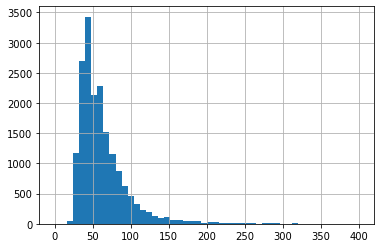

In [35]:
draw_hist('total_area', 0, 400)

Гистограмма по столбцу total_area выглядит правдоподобно - квартир площадью менее 25 кв.м почти нет, большая доля квартир имеет площадь 30-60 кв.м, также видим мощный пик у значения 45 кв.м. После значения 100 кв.м число квартир стремительно убывает.

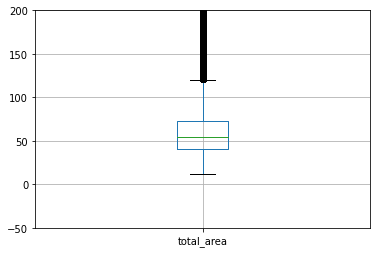

In [36]:
draw_boxplot('total_area')

Разброс нормальных значений начинается около 15 кв.м и заканчивается у 120 кв.м. Избавимся от всех выбивающихся значений.

In [37]:
df = df.query('total_area>=15 and total_area<=120')

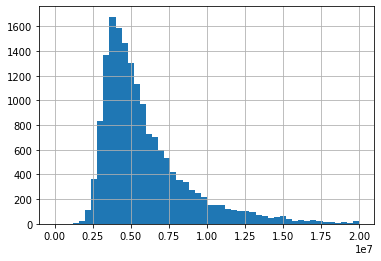

In [38]:
draw_hist('last_price', 0, 20000000)

График принимает ожидаемый вид. Можем отметить пик у значения цены 3 млн. Квартир, дороже 10 млн, гораздо меньше.

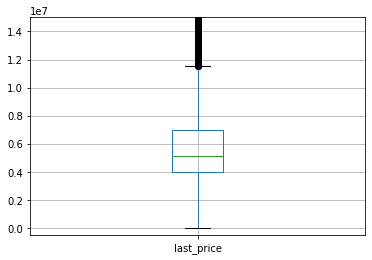

In [39]:
draw_boxplot('last_price', -500000, 15000000)

Нормальные значения находятся в интервале от нуля до 11 млн. Оставим только их. Но сначала проверим, нет ли в данных неочивидных выбросов - например, значений, меньших 10 тыс.

In [40]:
display(df.query('last_price < 10000'))

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,kitchen_part,sq_m_price,exposition_weekday,exposition_month,exposition_year,floor_type,living_area_part


Это объявление выглядит странным. Избавимся от него при фильтрации.

In [41]:
df = df.query('last_price>10000 and last_price<=11000000')

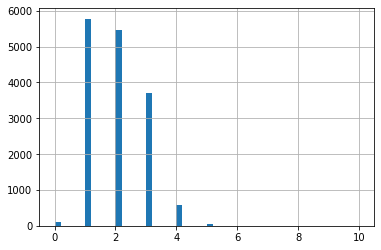

In [42]:
draw_hist('rooms', 0, 10)

У большинства квартир 1-3 комнаты. Видим небольшой сегмент с нулевым количеством комнат. Это студии.

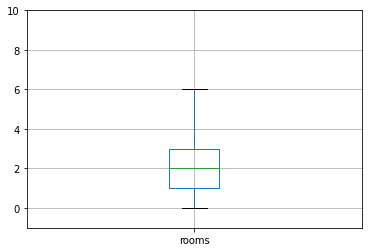

In [43]:
draw_boxplot('rooms', -1, 10)

Нормальные значения - от 0 до 6, оставим только их.

In [44]:
df = df.query('rooms>=0 and rooms <7')

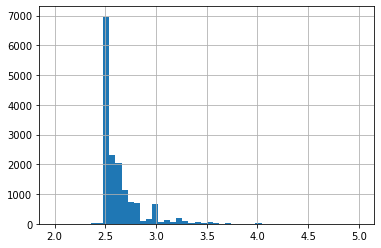

In [45]:
draw_hist('ceiling_height', 2, 5)

У большей части квартир высота потолков 2,5-2,7 м.

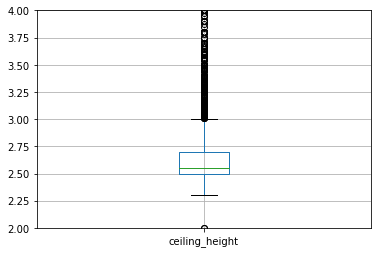

In [46]:
draw_boxplot('ceiling_height', 2, 4)

Избавимся от всех значений, меньших 2 м и больших 4,5 м.

In [47]:
df = df.query('ceiling_height>=2 and ceiling_height <=4.5')

Построим гистограмму для времени продажи квартиры, изучим эти данные.

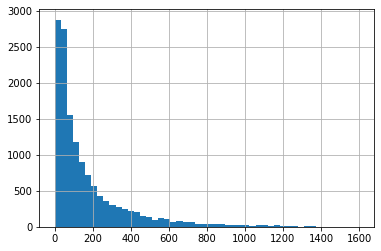

In [48]:
draw_hist('days_exposition', 0, 1600)

Ожидаемое распределение дней размещения — гистограмма с длинным хвостом на высоких значениях и падением в ноль слева от пика, не доходя до нулевого значения. Вместо этого мы видим пик прямо рядом с нулём. Посмотрим, как выглядит диаграмма размаха для этих данных.

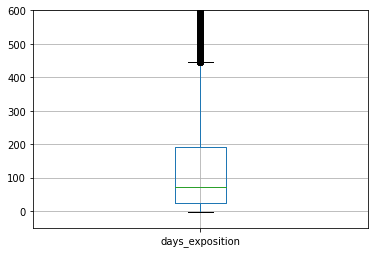

In [49]:
draw_boxplot('days_exposition', -50, 600)

Большая часть значений находится в диапазоне до 250 дней. Посмотрим на среднее и медиану.

In [50]:
print(df['days_exposition'].describe())

count    15609.000000
mean       151.857070
std        205.309399
min         -1.000000
25%         24.000000
50%         72.000000
75%        193.000000
max       1553.000000
Name: days_exposition, dtype: float64


Можно считать, что сделка прошла быстро, если продажа состоялась в срок до 24 дней после подачи объявления, а если сделка состоялась через 193 и больше дней - она длилась долго.

Разница среднего и медианы почти в два раза. Это говорит о том, что в распределении длинный хвост высоких значений, влияющих на среднее, но не на медиану. Действительно, видим, что третий квартиль у нас заканчивается на значении 193, а максимальное значение - целых 1553 дня. Как видим по графикам, нормальные значения находятся в промежутке от 0 до 430.

Изучим, какие факторы больше всего влияют на стоимость квартиры. Зависит ли цена квадратного метра от числа комнат и удалённости от центра? Также изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.

In [51]:
def draw_plot(data, y, x):
    data.plot(y=y, x=x, kind='scatter', alpha=0.05)

In [52]:
# создадим сводную таблицу 
index = df.index 
price_rooms_area_corr = df.pivot_table(index=index, values=['total_area','rooms', 'sq_m_price'], aggfunc='mean')

# построим матрицу корреляции
display(price_rooms_area_corr.corr())

,rooms,sq_m_price,total_area
rooms,1.000000,-0.348270,0.801312
sq_m_price,-0.348270,1.000000,-0.211894
total_area,0.801312,-0.211894,1.000000


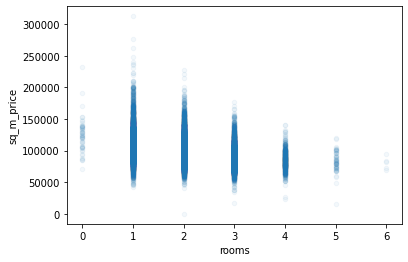

In [53]:
draw_plot(price_rooms_area_corr, 'sq_m_price', 'rooms')

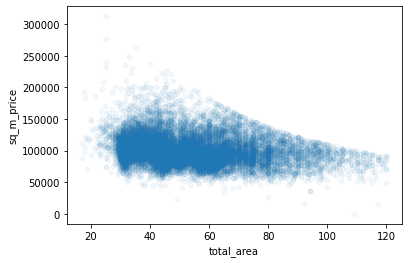

In [54]:
draw_plot(price_rooms_area_corr, 'sq_m_price', 'total_area')

Видим, что стоимость средне зависит от общей площади, и в меньшей степени от количества комнат. Как наблюдение - больше всего в таблице зависимость между количеством комнат и площадью, что достаточно логично.

Тем не менее, с увеличением количества комнат цена за кв.м падает. А если рассматриваем общую площадь, то стоимость за квадратный метр падает с каждым метром при увеличении площади после 60 кв.м.

In [55]:
# с помощью метода query() отберем занчения для последующего расчета коэффициента корреляции
distance_from_center = df.query('cityсenters_nearest != -1')
print(distance_from_center['sq_m_price'].corr(distance_from_center['cityсenters_nearest']))

-0.39181294670888006


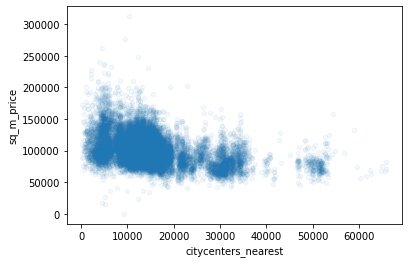

In [56]:
draw_plot(distance_from_center, 'sq_m_price', 'cityсenters_nearest')

Коэффициент корреляции отрицательный. Это значит, что увеличение расстояния от центра связано с уменьшением стоимости квартиры, что подтверждается на графике.

Посмотрим на взаимосвязь стоимости квартиры и этажа, на котором она расположена.

AxesSubplot(0.125,0.125;0.775x0.755)


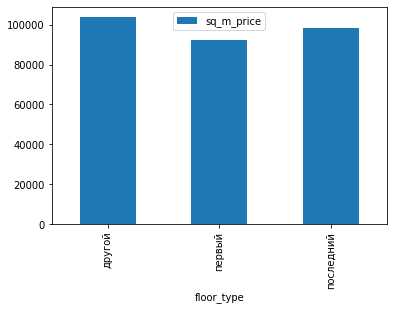

In [57]:
print(df.pivot_table(index='floor_type',values='sq_m_price',aggfunc='mean').plot(kind='bar'))

Видим, что квартиры, расположенные на первом и последнем этаже, стоят дешевле, чем на любом другом.

С помощью метода heatmap из библиотеки seaborn визуалицируем корреляцию.

AxesSubplot(0.125,0.1925;0.62x0.62)


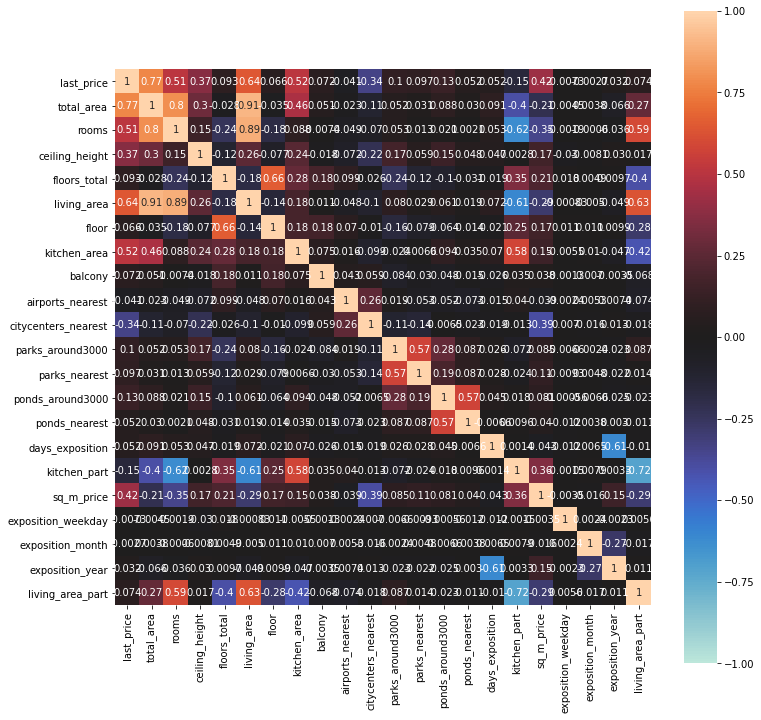

In [58]:
fig, ax = plt.subplots(figsize=(12,12))
print(sns.heatmap(df.corr(), annot=True, square=True, vmin=-1, vmax=1, center=0, ax=ax))

С помощью графика можем отметить, что что есть слабая корреляция у параметра sq_m_price c общей и жилой площадью, площадью кухни, удаленность от центра города, а так же инфраструктурой вокруг (парки, водоемы, аэропорты).

Посмотрим на взаимосвязь стоимости и времени размещения объявления: дня недели, месяца и года.

AxesSubplot(0.125,0.125;0.775x0.755)


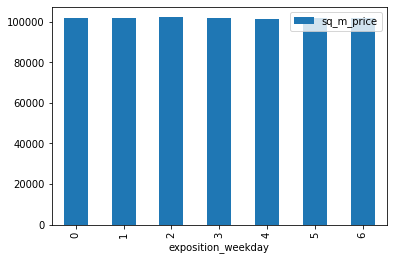

In [59]:
print (df.pivot_table(index='exposition_weekday', values='sq_m_price', aggfunc='mean')
                .plot(kind='bar') 
)

AxesSubplot(0.125,0.125;0.775x0.755)


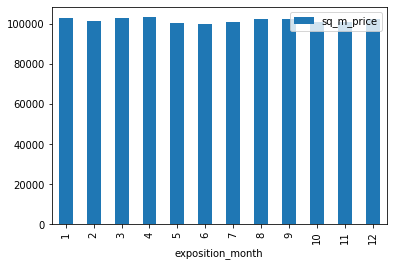

In [60]:
print (df.pivot_table(index='exposition_month',values='sq_m_price',aggfunc='mean')
                .plot(kind='bar') 
)

AxesSubplot(0.125,0.125;0.775x0.755)


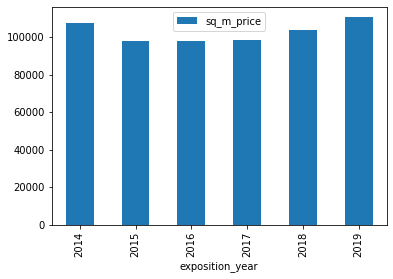

In [61]:
print (df.pivot_table(index='exposition_year',values='sq_m_price',aggfunc='mean')
                .plot(kind='bar') 
)

**Приходим к следующим выводам:**

* Прямой зависимости стоимости квадаратного мтера от дня размещения объявления не выявлено.
* Квартиры, выставленные на продажу в январе и аперле дороже всего. Дешевле всего - в июне.
* С 2015 года можем отметить тенденцию роста цен от года к году, однако дороже всего квартиры стоили в 2019 году.

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

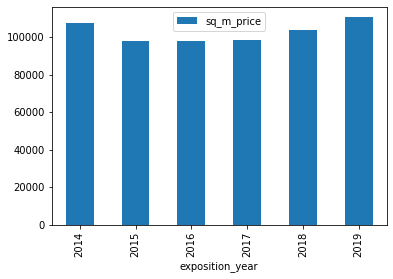

In [62]:
# код ревьюера. Можно ли сказать, что "дороже всего квартиры стоили в 2018 году"?

(df.pivot_table(index='exposition_year',values='sq_m_price',aggfunc='mean')
                .plot(kind='bar') 
);

AxesSubplot(0.135,0.125;0.755x0.755)


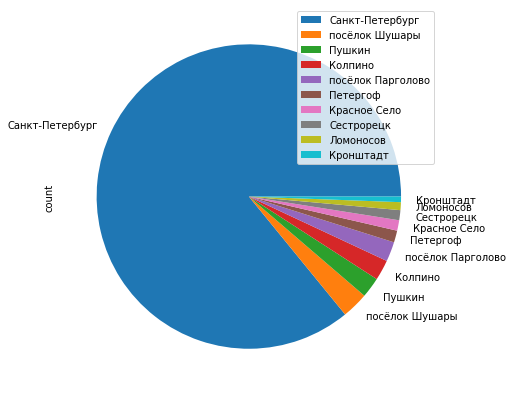

In [63]:
locality_sq_m_price = df.loc[:, ['locality_name', 'sq_m_price']]
locality_sq_m_price = locality_sq_m_price.pivot_table(index='locality_name', values='sq_m_price', aggfunc=['count', 'mean'])
locality_sq_m_price.columns = ['count', 'mean_sq_m_price']
top10_locality = locality_sq_m_price.sort_values(by='count', ascending=False).head(10)
print(top10_locality.plot(y='count', kind='pie', figsize=(7, 7)))

In [64]:
display(top10_locality)

,count,mean_sq_m_price
locality_name,,
Санкт-Петербург,13231,105011.685209
посёлок Шушары,433,78199.381062
Пушкин,334,100179.227545
Колпино,334,75198.985030
посёлок Парголово,322,90448.400621
Петергоф,194,83118.530928
Красное Село,171,71998.625731
Сестрорецк,164,100125.280488
Ломоносов,129,73012.806202


Дороже всего кадратный метр стоит в Санкт-Петербурге (что неудивительно) и в Пушкине. Дешевле всего квартиру можно купить в Выборге.

Выделим квартиры в Санкт-Петербурге и выясним, какая область входит в центр. Расстояние до центра приведем в километры и округлим до целых значений. Посчитаем среднюю цену для каждого километра. Затем построим график, который покажет, как цена зависит от удалённости от центра.

AxesSubplot(0.125,0.125;0.775x0.755)


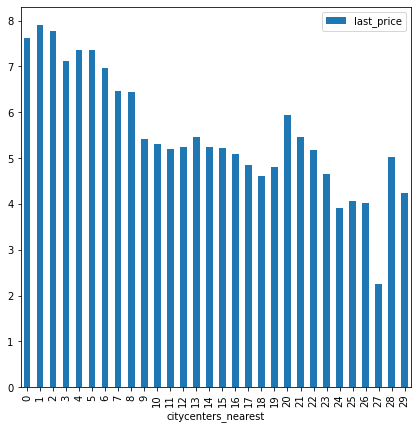

In [65]:
flats_in_spb = df.query('locality_name == "Санкт-Петербург"')
flats_in_spb = flats_in_spb.query('cityсenters_nearest != -1')
flats_in_spb_price = flats_in_spb.loc[:, ['locality_name', 'cityсenters_nearest','last_price']]

# приводим расстояние в км, округляем
flats_in_spb_price['cityсenters_nearest'] = (flats_in_spb_price['cityсenters_nearest']/1000).round().astype(int)

# приводим цену в млн
flats_in_spb_price['last_price'] = flats_in_spb_price['last_price']/1000000
flats_in_spb_pivot = flats_in_spb_price.pivot_table(index='cityсenters_nearest', values='last_price', aggfunc=('mean'))
print(flats_in_spb_pivot.plot(y='last_price', kind='bar', figsize=(7, 7)))

Начиная с третьего километра цена сильно падает. С 4 по 7 километры также есть небольшой всплеск стоимости. Будем считать центром километры с 0 по 2 включительно.

Выделим сегмент квартир в центре Санкт-Петербурга.

In [66]:
flats_in_spb_center = flats_in_spb.query('cityсenters_nearest != -1')
flats_in_spb_center['cityсenters_nearest'] = (flats_in_spb_center['cityсenters_nearest']/1000).round().astype(int)
flats_in_spb_center = flats_in_spb_center.query('cityсenters_nearest < 3')

In [67]:
def draw_hist_spb(col, xmin=0, xmax=7):
    flats_in_spb_center[col].hist(bins=50, range=(xmin,xmax))

Для этой территории изучим следующие параметры: площадь, цена, число комнат, высота потолков.

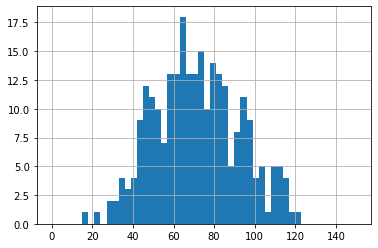

In [68]:
draw_hist_spb('total_area', xmax=150)

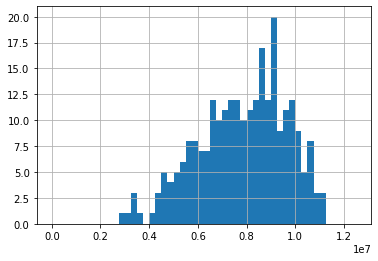

In [69]:
draw_hist_spb('last_price', xmax=12500000)

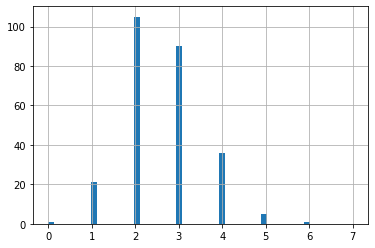

In [70]:
draw_hist_spb('rooms')

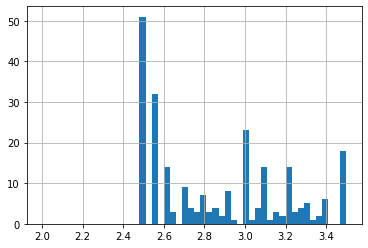

In [71]:
draw_hist_spb('ceiling_height', xmin=2, xmax=3.5)

**О квартирах в центре Санкт-Петербурга можем сделать следующие выводы:**

* они имеют бОльшую площадь - 70-80 кв.м (против 45-50 кв.м);
* их стоимость гораздо больше - если на общем графике пиковое значение цены было 3 млн, то здесь это значение почти в 3 раза больше;
* количество комнат в них больше - в основном, 2-4 комнаты (против 1-3);
* потолки выше - помимо медианного значения 2.5, видим пик у значения 3/

Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [72]:
print(flats_in_spb_center['sq_m_price'].corr(flats_in_spb_center['rooms']))

-0.40875769289823705


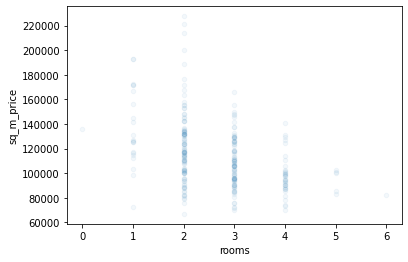

In [73]:
draw_plot(flats_in_spb_center,'sq_m_price','rooms')

В центре Санкт-Петербурга стоимость квартиры и количество комнат связаны больше. С увеличением комнат в квартире стоимость квадратного метра уменьшается.

In [74]:
print(flats_in_spb_center['sq_m_price'].corr(flats_in_spb_center['cityсenters_nearest']))

0.003655059167827331


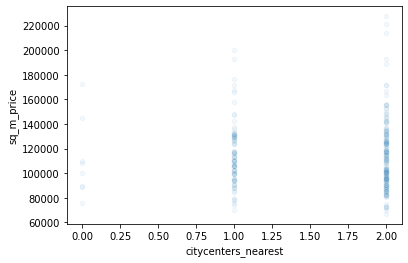

In [75]:
draw_plot(flats_in_spb_center,'sq_m_price','cityсenters_nearest')

Взаимосвязь этих двух параметров в центре Санкт-Петербурга совсем маленькая. У нас мало объявлений на нулевом и первом километре Санкт-Петербурга, но по данным, которые есть, можно судить, что в центре города квартиры одинаково дорогие на километрах 0-2.

AxesSubplot(0.125,0.125;0.775x0.755)


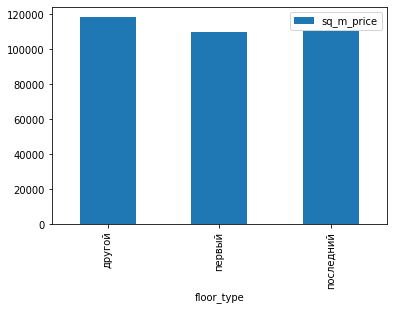

In [76]:
print(flats_in_spb_center.pivot_table(index='floor_type',values='sq_m_price',aggfunc='mean')
                .plot(kind='bar') 
)

Квартиры на первом и последнем этаже также дешевле.

In [77]:
index1 = flats_in_spb_center.index
exposition_date_spb = flats_in_spb_center.pivot_table(index=index1, values=['exposition_weekday', 'exposition_month', 'exposition_year', 'sq_m_price'], aggfunc='mean')

AxesSubplot(0.125,0.125;0.775x0.755)


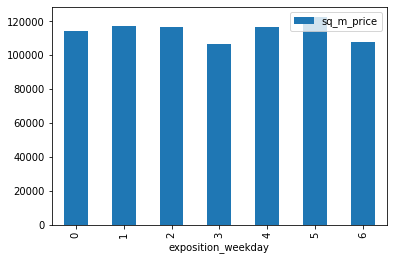

In [78]:
print(flats_in_spb_center.pivot_table(index='exposition_weekday',values='sq_m_price',aggfunc='mean')
                .plot(kind='bar') 
)

AxesSubplot(0.125,0.125;0.775x0.755)


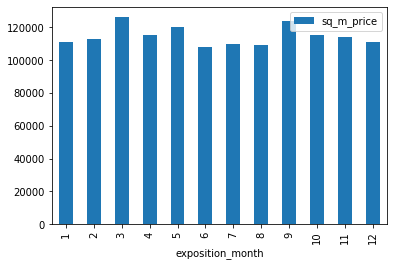

In [79]:
print(flats_in_spb_center.pivot_table(index='exposition_month',values='sq_m_price',aggfunc='mean')
                .plot(kind='bar') 
)

AxesSubplot(0.125,0.125;0.775x0.755)


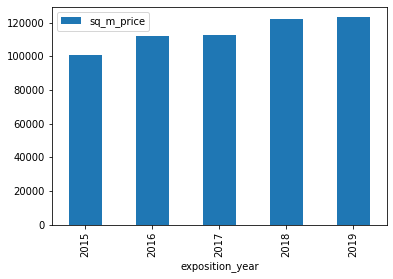

In [80]:
print(flats_in_spb_center.pivot_table(index='exposition_year',values='sq_m_price',aggfunc='mean')
                .plot(kind='bar') 
)

**Выводы:**

* Дешевле всего квадратный метр стоит в объявлениях, размещенных в четверг и воскресенье.
* Квартиры, выставленные на продажу в марте и сентябре, дороже всего. Дешевле всего - в летние месяцы и январе, декабре.
* Дороже всего квартиры стоили в 2018 и 2019 годах.

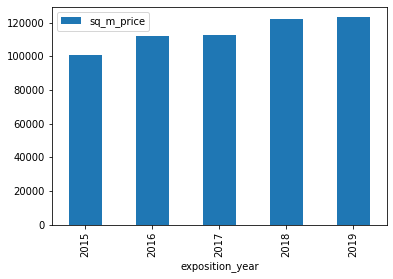

In [81]:
# код ревьюера. Можно ли сказать, что "Дороже всего квартиры стоили в 2017 и 2018 годах"?

(flats_in_spb_center.pivot_table(index='exposition_year',values='sq_m_price',aggfunc='mean')
                .plot(kind='bar') 
);

## Общий вывод

В ходе проведенного анализа был изучен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, с целью впоследствии использовать данную информацию для  определения рыночной стоимости объектов недвижимости.

Были выполнены следующие задачи:

* заполнены пропущенные данные в исследуемых столбцах;
* установлены параметры (площадь, цена, число комнат, высота потолков и др.);
* установлены связи между разными параметрами и построены графики;
* исключены редкие и выбивающиеся значения;
* подгостовлены ответы на поставленные в исслеовании вопросы.

**На основании проведенного анализа пришли к выводам:**

* от дня размещения объявления до продажи квартиры обычно проходит от 24 до 193 дней;
* дороже всего кадратный метр стоит в Санкт-Петербурге и в Пушкине, дешевле всего квартиру можно купить в Выборге;
* стомиость квдратного метра на первом и последнем этаже дешевле, чем на любом другом;
* отдаление от центра города связано с уменьшением стоимости квадратного метра недвижимости, при этом центральной цасти Санкт-Петербурга это не касается - здесь квартиры одинаково дорогие;
* квартиры в центре Санкт-Петербурга имеют бОльшую площадь, чем в других районах и населенных пунктах;
* стоимость квадратного метра в центре Санкт-Петербурга гораздо больше - почти в 3 раза;
* количество комнат в квартирах в центре Санкт-Петербурга больше - в основном, 2-4 комнаты (против 1-3), потолки выше;
* обнаружилась следующая cвязь между временем размещения объявления и стоимостью квадратного метра: 
 - стомиость квадаратоного метра квартир, выставленных на продажу в январе и апреле дороже ,чем в другие месяцы;
 - зависимость стоимости квадратного метра от дня публикации обявления не установлена, однако для центра Санк-Петербурга установлено, что дешевле всего квадратный метр стоит в объявлениях, размещенных в четверг и воскресенье;
 - квартиры были дороже всего в 2018 и 2019 году для центра Санкт-Петербурга и в 2019 для всех остальных районов и населенных пунктов.